In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
from PIL import Image

In [3]:
classifier = Sequential()

In [4]:
classifier.add(Conv2D(64,(5,5),input_shape = (500,1000,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (4,4)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 28, activation = 'relu'))


In [0]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

#train_data_dir = '/gdrive/My Drive/Colab Notebooks/cnn/2-keras-cnn-catdog/dataset/training_set'
#validation_data_dir = '/gdrive/My Drive/Colab Notebooks/cnn/2-keras-cnn-catdog/dataset/test_set'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_set = train_datagen.flow_from_directory('/gdrive/My Drive/Train',
                                               target_size=(500, 1000),
                                               
                                               class_mode='binary')

Found 164 images belonging to 2 classes.


In [13]:
train_set.class_indices

{'Bub': 0, 'Lisa': 1}

In [14]:
test_set = test_datagen.flow_from_directory('/gdrive/My Drive/Test',
                                            target_size=(500, 1000),
                                            
                                            class_mode='binary')

Found 42 images belonging to 2 classes.


In [26]:
classifier.fit_generator(
        train_set,
        epochs=3,
        validation_data=test_set
        )

Epoch 1/3
6/6 [==============================] - 147s 24s/step - loss: 3.8910e-04 - acc: 1.0000 - val_loss: 0.8089 - val_acc: 0.8095
Epoch 2/3
6/6 [==============================] - 139s 23s/step - loss: 1.5379e-04 - acc: 1.0000 - val_loss: 0.7159 - val_acc: 0.8095
Epoch 3/3
6/6 [==============================] - 139s 23s/step - loss: 2.2940e-04 - acc: 1.0000 - val_loss: 0.7117 - val_acc: 0.8333


In [0]:
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/gdrive/My Drive/Lisa/1.jpg'
                           
                           ,target_size =(500,1000,3))


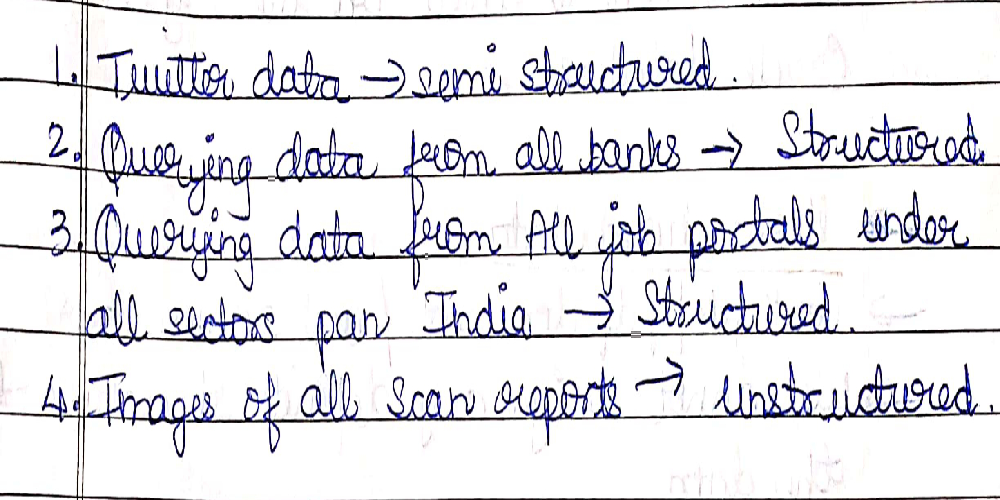

In [46]:
test_image

In [0]:
test_image = image.img_to_array(test_image)

In [48]:
test_image.shape

(500, 1000, 3)

In [0]:
test_image=test_image.reshape(1,500,1000,3)

In [0]:
result = classifier.predict(test_image)

In [51]:
result

array([[1.]], dtype=float32)

In [0]:
if result == 0:
    prediction = 'Akshita'
else:
    prediction = 'Lisa'

    

In [53]:
print(prediction)

Lisa
